# Easy
Взять датасет с kaggle https://www.kaggle.com/datasets/uciml/iris и обучить на нем дерево решений с перебором параметров с помощью grid search. Вывести метрики качества accuracy ,presicion, recall, F1-score для лучше модели

# Medium
Провести полноценное исследование:

Визуализировать данные (провести EDA)
Если требуется, подготовить данные к обучению модели
Обучить 4 различные модели классификации, посчитать accuracy ,presicion, recall, F1-score для каждой модели
Проверить действительно ли есть статистическое различие между метриками качества моделей
Выбрать лучшую модель

# Hard
Необходимо вынести лучшую модель в отдельный скрипт:

Скрипт должен подгружать уже обученную модель (то есть модель делает только предсказания на данных)
Скрипт должен принимать путь до csv файла с данными для предсказания
Скрипт должен принимать путь до файла куда будут складываться ответы
Рекомендации к выполнению задания:

Необходимо найти информацию как сохранять и подгружать обученную модель sklearn
Необходимо найти информацию как делать скрипты в python с параметрами (попробуйте библиотеку click)
Запуск скрипта должен выглядеть следующим образом "python best_model.py --path_to_data 'data_for_prediction.csv' --path_to_prediction 'predictions.csv"

--------------------------------------------------------------------------------------------------------------
# EASY

In [49]:
# загружаем все библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from mlxtend.plotting import category_scatter, plot_decision_regions
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [50]:
iris = pd.read_csv('/home/euegene/learn/DS_Learn/Data/iris.csv') # загружаем датасет

In [51]:
print(iris.Species.unique()) #смотрим уникальные значения - те, что собраемся предсказывать

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [52]:
iris.head() #смотрим датасет

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
x = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] #формируем данные для обучения
y = iris[['Species']].values.ravel() #формируем цели обучения
x_train, x_test, y_train, y_test = train_test_split(x, y) #разбиваем датасет на фрагменты

In [54]:
# задаем набор гиперпараметров
params = {
    'n_estimators': [5, 100, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 100, 150]
}

In [58]:
%%time 
#выбираем наилучшие параметры и обучаем модель
model = GridSearchCV(RandomForestClassifier(), params)
model.fit(x_train, y_train)
model.best_estimator_

CPU times: user 11.2 s, sys: 51.9 ms, total: 11.3 s
Wall time: 11.3 s


RandomForestClassifier(max_depth=100, n_estimators=5)

In [59]:
y_pred = model.predict(x_test) #делаем предсказание

In [60]:
#выводим все метрики
print("Recall Score : ",recall_score(y_test, y_pred, average='macro'))
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Precision : ", precision_score(y_test, y_pred, average='macro'))
print("F1-Score : ", f1_score(y_test, y_pred, average='macro'))

Recall Score :  0.9666666666666667
Accuracy :  0.9736842105263158
Precision :  0.9824561403508771
F1-Score :  0.9734471313418682


------------------------------------------------------------------------------------------------------------------
# Normal

In [61]:
iris2 = pd.read_csv('/home/euegene/learn/DS_Learn/Data/iris.csv')
print('Общая информация')
iris2.info()

Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [62]:
print('Поиск нулевых значений в датасете')
iris2.isnull().sum()

Поиск нулевых значений в датасете


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Нулевых значений не наблюдается - данные по этому параметру готовить не нужно

In [63]:
iris2.head() #выведем датасет

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


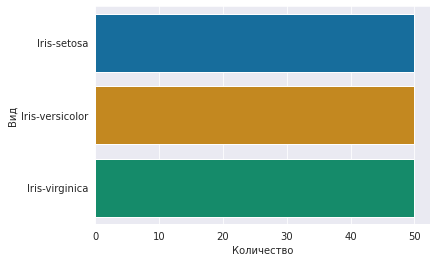

In [64]:
#Исследуем соотношение видов ирисов в наборе
sns.set_style('darkgrid')
sns.countplot(y='Species',data=iris2,palette='colorblind')
plt.xlabel('Количество')
plt.ylabel('Вид')
plt.show()

In [65]:
iris2.groupby(iris2['Species'])['Id'].count()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Id, dtype: int64

Число видов в наборе одинаково, далее исследуем зависимости в датасете

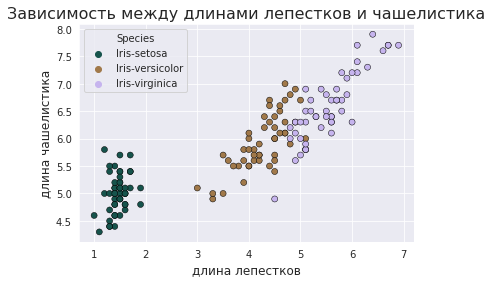

In [66]:
# исследуем зависимость между длинной лепестков (petal_lenght ) и длинной чашелистика (sepal_length) у видов
sns.set_style('darkgrid')
plt.title('Зависимость между длинами лепестков и чашелистика',size=16)
plt.xlabel('длина лепестков',size=12)
plt.ylabel('длина чашелистика',size=12)
sns.scatterplot(x='PetalLengthCm', y='SepalLengthCm', data=iris2, hue='Species', edgecolor='black', palette='cubehelix')
plt.show()

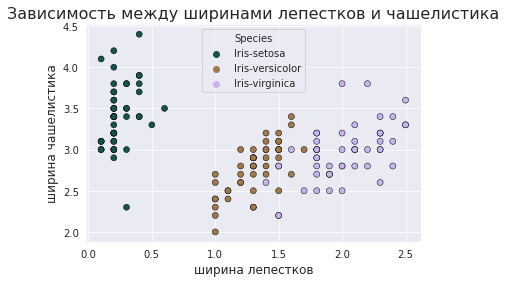

In [67]:
# исследуем зависимость между шириной лепестков (petal_width ) и ширииной чашелистика (sepal_width) у видов
sns.set_style('darkgrid')
plt.title('Зависимость между ширинами лепестков и чашелистика',size=16)
plt.xlabel('ширина лепестков',size=12)
plt.ylabel('ширина чашелистика',size=12)
sns.scatterplot(x='PetalWidthCm', y='SepalWidthCm', data=iris2, hue='Species', edgecolor='black', palette='cubehelix')
plt.show()

Далее начинаем готовить модели: model1 = логистическая регрессия, model2 = деревья решений, model3 = метод опорных векторов , model4 = случайный лес


In [68]:
iris2["Species"] = iris2["Species"].astype('category') #добавим числовое выражение категории

In [69]:
iris2["species_cat"] = iris2["Species"].cat.codes
iris2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species_cat
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [70]:
# логистическая регрессия - model1
x1 = iris2[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] #формируем данные для обучения
y1 = iris2[['species_cat']].values.ravel() #формируем цели обучения

In [71]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, train_size=0.8) #разбиваем датасет на фрагменты
model1 = LogisticRegression()
model1.fit(x_train1, y_train1)

LogisticRegression()

In [72]:
y_pred1 = model1.predict(x_test1)

In [73]:
confusion_matrix(y_test1, y_pred1)

array([[11,  0,  0],
       [ 0,  7,  1],
       [ 0,  1, 10]])

In [74]:
#выводим все метрики
print("Recall Score : ",recall_score(y_test1, y_pred1, average='macro'))
print("Accuracy : ", accuracy_score(y_test1, y_pred1))
print("Precision : ", precision_score(y_test1, y_pred1, average='macro'))
print("F1-Score : ", f1_score(y_test1, y_pred1, average='macro'))

Recall Score :  0.9280303030303031
Accuracy :  0.9333333333333333
Precision :  0.9280303030303031
F1-Score :  0.9280303030303031


In [75]:
# деревья решений - model 2
x2 = iris2[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] #формируем данные для обучения
y2 = iris2[['species_cat']].values.ravel() #формируем цели обучения
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, train_size=0.8) #разбиваем датасет на фрагменты
model2 = DecisionTreeClassifier(criterion='gini',max_depth=2)
model2.fit(x_train2, y_train2)

DecisionTreeClassifier(max_depth=2)

In [76]:
y_pred2 = model2.predict(x_test2)

In [77]:
#выводим все метрики
print("Recall Score : ",recall_score(y_test2, y_pred2, average='macro'))
print("Accuracy : ", accuracy_score(y_test2, y_pred2))
print("Precision : ", precision_score(y_test2, y_pred2, average='macro'))
print("F1-Score : ", f1_score(y_test2, y_pred2, average='macro'))

Recall Score :  0.9696969696969697
Accuracy :  0.9666666666666667
Precision :  0.9743589743589745
F1-Score :  0.9707936507936509


In [78]:
# метод опорных векторов - model 3
x3 = iris2[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] #формируем данные для обучения
y3 = iris2[['species_cat']].values.ravel() #формируем цели обучения
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, train_size=0.8) #разбиваем датасет на фрагменты
model3 = SVC()
model3.fit(x_train3, y_train3)

SVC()

In [79]:
y_pred3 = model3.predict(x_test3)

In [80]:
#выводим все метрики
print("Recall Score : ",recall_score(y_test3, y_pred3, average='macro'))
print("Accuracy : ", accuracy_score(y_test3, y_pred3))
print("Precision : ", precision_score(y_test3, y_pred3, average='macro'))
print("F1-Score : ", f1_score(y_test3, y_pred3, average='macro'))

Recall Score :  0.9074074074074074
Accuracy :  0.9
Precision :  0.903030303030303
F1-Score :  0.9038901601830663


In [81]:
# случайный лес - model 4
x4 = iris2[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] #формируем данные для обучения
y4 = iris2[['species_cat']].values.ravel() #формируем цели обучения
x_train4, x_test4, y_train4, y_test4 = train_test_split(x4, y4) #разбиваем датасет на фрагменты
model4 =  RandomForestClassifier()
model4.fit(x_train4, y_train4)


RandomForestClassifier()

In [82]:
y_pred4 = model4.predict(x_test4)

In [83]:
print("Recall Score : ",recall_score(y_test4, y_pred4, average='macro'))
print("Accuracy : ", accuracy_score(y_test4, y_pred4))
print("Precision : ", precision_score(y_test4, y_pred4, average='macro'))
print("F1-Score : ", f1_score(y_test4, y_pred4, average='macro'))

Recall Score :  0.9607843137254902
Accuracy :  0.9473684210526315
Precision :  0.9444444444444445
F1-Score :  0.9488636363636364


Как выбрать лучшую модель по статистическим параметрам я не понял!! - нужна
консультация. Но выберем для этапа hard модель по наибольшим параметрам Precision - это будет model2 = DecisionTree 

-------------------------------------------------------------------------------------------------------------------
# Hard

In [85]:
# метод опорных векторов - model 2

In [48]:
import joblib
import click

In [84]:
# сохраняем обученную модель в файл
filename = '/home/euegene/learn/DS_Learn/Data/DSTmodel.sav'
joblib.dump(model2, filename)

['/home/euegene/learn/DS_Learn/Data/DSTmodel.sav']

Содержание файла скрипта:

import click
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
@click.command()
@click.option('--inputpath', help='Path to input data file')
@click.option('--modelpath', help='Path to model file')
@click.option('--predictpath', help='Path to the prediction')
def prediction(inputpath,modelpath,predictpath):
	model = joblib.load(modelpath)
	data = pd.read_csv(inputpath)
	y_pred = model.predict(data)
	final = pd.DataFrame(data=y_pred)
	final.to_csv(predictpath)
if __name__ == '__main__':
    prediction()

запуск скрипта:
(my-env) euegene@AEPC:~/learn/DS_Learn$ python click_script.py --inputpath='/home/euegene/learn/DS_Learn/Data/iris_for_script.csv' --modelpath='/home/euegene/learn/DS_Learn/Data/DSTmodel.sav' --predictpath='/home/euegene/learn/DS_Learn/Data/out.csv'
    